# segmentation algorithm that should work for dicty. stream segmentation from the 2d DIC channel
Tim Tyree<br>
11.11.2021
- includes starting point for extending algorithm to 3d

---
Ruibin Feng
11:58 AM (13 minutes ago)
to me, Wouter-Jan

Hi, Timothy,

This is very helpful. Thanks for sharing!

Best,
Ruibin Feng
---
Timothy Tyree
12:04 PM (7 minutes ago)
to Ruibin, Wouter-Jan

You're welcome, Ruibin!  

It should be relatively straightforward to implement this in 3d if you get a skeleton transform working in 3d. An imagej plugin does this in the links at the start, but it might be surprisingly simple to implement in a low-level way in your favorite language/interface.

Best,
Tim
---

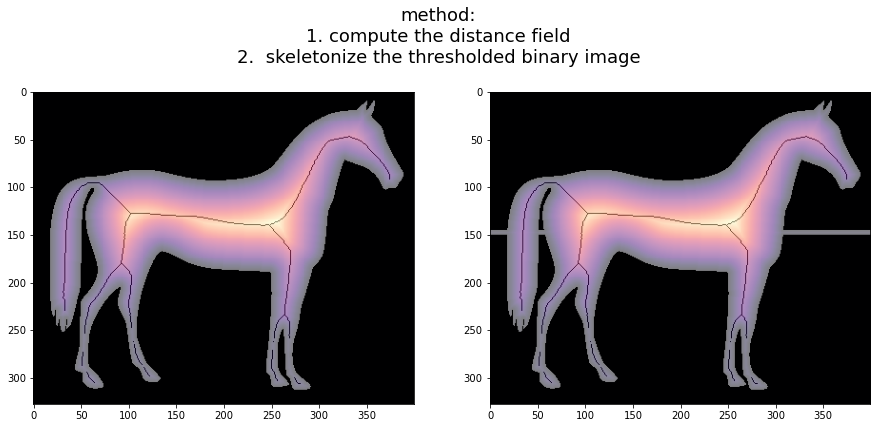

In [1]:
#documentation on 3d skeleton transform in 3d objects
# 3d skeleton transform plugin written in imageJ
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5415168/
# how to use imagej plugins from python
# https://imagej.net/scripting/python
#documentation on the following implementation in 2d image skelatonization
# https://scikit-image.org/docs/0.13.x/auto_examples/edges/plot_skeleton.html
# the medial axis distance transform
import matplotlib.pyplot as plt, numpy as np
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage.morphology import skeletonize, skeletonize_3d, medial_axis
from skimage.data import binary_blobs
# Invert the horse image
image = invert(data.horse())
#perturb
image2=image.copy()
image2[145:150,:]=1
# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(image, return_distance=True)
# Distance to the background for pixels of the skeleton
dist_on_skel = distance #* skel
# Compute the medial axis (skeleton) and the distance transform
skel2, distance2 = medial_axis(image2, return_distance=True)
# Distance to the background for pixels of the skeleton
dist_on_skel2 = distance2 #* skel2
# visualize the skeletonization with the medial axis distance transform
cmin=np.min((np.min(dist_on_skel),np.min(dist_on_skel2)))
dist_on_skel -=cmin
dist_on_skel2-=cmin

# perform skeletonization
dist_thresh=5
# skeleton = skeletonize(image)
skeleton = skeletonize_3d(dist_on_skel>dist_thresh)
# skeleton2 = skeletonize(image2)
skeleton2 = skeletonize_3d(dist_on_skel2>dist_thresh)

vmin=np.min((np.min(dist_on_skel),np.min(dist_on_skel2)))
vmax=np.max((np.max(dist_on_skel),np.max(dist_on_skel2)))
distplot_kwargs=dict(cmap='magma', interpolation='nearest',alpha=.5,vmin=vmin,vmax=vmax)
fig,axs=plt.subplots(ncols=2,figsize=(15,7))
# axs[0].imshow(image,cmap='gray')#&~skeleton,cmap='gray')
axs[0].imshow(image&~skeleton,cmap='gray')
axs[0].imshow(dist_on_skel, **distplot_kwargs)
# axs[1].imshow(image2,cmap='gray')#&~skeleton2,cmap='gray')
axs[1].imshow(image2&~skeleton2,cmap='gray')
axs[1].imshow(dist_on_skel2, **distplot_kwargs)
fig.suptitle('method:\n1. compute the distance field\n2.  skeletonize the thresholded binary image',fontsize=18)
plt.show()